#Lets Start

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_excel('/content/Data_Train.xlsx')
test=pd.read_excel('/content/Test_set.xlsx')
sample=pd.read_excel('/content/Sample_submission.xlsx')

Importing test and train dataset

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Checking null values

In [4]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#Preprocessing

In [5]:
train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [6]:
train['Date_of_Journey']=pd.to_datetime(train['Date_of_Journey'])
train['Date_of_Journey_year']=train['Date_of_Journey'].dt.year
train['Date_of_Journey_month']=train['Date_of_Journey'].dt.month
train['Date_of_Journey_day']=train['Date_of_Journey'].dt.day
train=train.drop('Date_of_Journey',axis=1)
train=train.drop(['Route','Additional_Info'],axis=1)

In [7]:
train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,2019,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,2019,1,3


In [8]:
train['Dep_hour']=pd.to_datetime(train['Dep_Time']).dt.hour
train['Dep_minute']=pd.to_datetime(train['Dep_Time']).dt.minute
train=train.drop('Dep_Time',axis=1)
train['arrival_hour']=pd.to_datetime(train['Arrival_Time']).dt.hour
train['arrival_minute']=pd.to_datetime(train['Arrival_Time']).dt.minute
train=train.drop('Arrival_Time',axis=1)

In [9]:
train.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day,Dep_hour,Dep_minute,arrival_hour,arrival_minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,2019,1,3,16,50,21,35


In [10]:
train['Duration_hour']=train['Duration'].str.split().str[0]
train['Duration_minute']=train['Duration'].str.split().str[1]
train['Duration_minute']=train['Duration_minute'].str.replace('m','')
train['Duration_hour']=train['Duration_hour'].str.replace('h','')
train=train.drop('Duration',axis=1)

In [11]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day,Dep_hour,Dep_minute,arrival_hour,arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,2019,9,6,9,25,4,25,19,NaN
3,IndiGo,Kolkata,Banglore,1 stop,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,2019,1,3,16,50,21,35,4,45


In [12]:
train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [13]:
train['Total_Stops']=train['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':5})

In [14]:
train['Total_Stops']=train['Total_Stops'].fillna(train['Total_Stops'].mode()[0])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

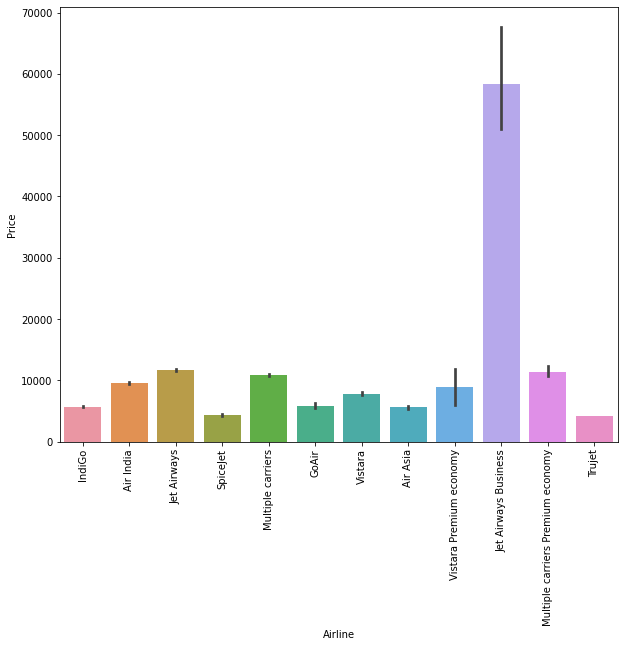

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x='Airline',y='Price',data=train)
plt.xticks(rotation=90)

We can see Jet Airways is most expensive

In [16]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [17]:
le=LabelEncoder()
train['Airline']=le.fit_transform(train['Airline'])
train['Source']=le.fit_transform(train['Source'])
train['Destination']=le.fit_transform(train['Destination'])

In [18]:
train.isna().sum()

Airline                     0
Source                      0
Destination                 0
Total_Stops                 0
Price                       0
Date_of_Journey_year        0
Date_of_Journey_month       0
Date_of_Journey_day         0
Dep_hour                    0
Dep_minute                  0
arrival_hour                0
arrival_minute              0
Duration_hour               0
Duration_minute          1032
dtype: int64

In [19]:
train.shape

(10683, 14)

In [20]:
train['Duration_minute']=train['Duration_minute'].fillna(0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


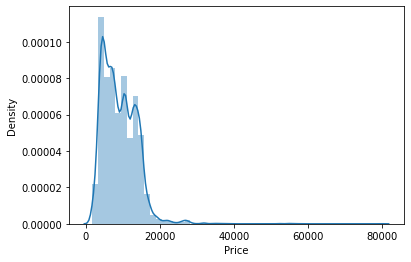

In [21]:
sns.distplot(train.Price)

In [22]:
train['Duration_hour']=train['Duration_hour'].replace('5m',5)
train['Duration_hour']=train['Duration_hour'].astype('int32')
train['Duration_minute']=train['Duration_minute'].astype('int32')

In [23]:
train.dtypes

Airline                    int64
Source                     int64
Destination                int64
Total_Stops              float64
Price                      int64
Date_of_Journey_year       int64
Date_of_Journey_month      int64
Date_of_Journey_day        int64
Dep_hour                   int64
Dep_minute                 int64
arrival_hour               int64
arrival_minute             int64
Duration_hour              int32
Duration_minute            int32
dtype: object

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X=train.drop('Price',axis=1)
y=train['Price']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [29]:
rf.score(X_test,y_test)

0.7914807227096267

In [30]:
!pip install lazypredict

In [31]:
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [32]:
lazy= LazyRegressor(predictions=True)
models, predictions = lazy.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:38<00:00,  1.08it/s]


In [33]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.83,0.83,1874.26,0.56
LGBMRegressor,0.83,0.83,1911.17,0.13
HistGradientBoostingRegressor,0.83,0.83,1918.84,0.58
ExtraTreesRegressor,0.80,0.80,2075.84,1.63
RandomForestRegressor,0.78,0.79,2129.51,2.27
BaggingRegressor,0.78,0.78,2172.66,0.25
GradientBoostingRegressor,0.78,0.78,2173.14,0.76
KNeighborsRegressor,0.69,0.69,2556.71,0.26
ExtraTreeRegressor,0.65,0.65,2702.75,0.08


In [34]:
from xgboost import XGBRegressor

In [35]:
xgb=XGBRegressor()
xgb.fit(X_test,y_test)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
xgb.score(X_test,y_test)

0.9705420048481606

In [37]:
y_pred=xgb.predict(X_test)

In [38]:
predict=pd.DataFrame(y_test)

In [39]:
predict['predicted_by_model']=y_pred

In [40]:
predict

,Price,predicted_by_model
7931,2753,2494.36
5468,6309,5825.73
8618,13731,12873.68
3836,13555,13542.85
7771,10844,11290.76
...,...,...
3807,8854,8578.00
6002,8656,7929.08
3716,3850,3984.91
5781,9443,9395.53


So model is predicting nice

#Lets predict price on test data

In [41]:
test['Date_of_Journey']=pd.to_datetime(test['Date_of_Journey'])
test['Date_of_Journey_year']=test['Date_of_Journey'].dt.year
test['Date_of_Journey_month']=test['Date_of_Journey'].dt.month
test['Date_of_Journey_day']=test['Date_of_Journey'].dt.day
test=test.drop('Date_of_Journey',axis=1)
test=test.drop(['Route','Additional_Info'],axis=1)

In [42]:
test['Dep_hour']=pd.to_datetime(test['Dep_Time']).dt.hour
test['Dep_minute']=pd.to_datetime(test['Dep_Time']).dt.minute
test=test.drop('Dep_Time',axis=1)
test['arrival_hour']=pd.to_datetime(test['Arrival_Time']).dt.hour
test['arrival_minute']=pd.to_datetime(test['Arrival_Time']).dt.minute
test=test.drop('Arrival_Time',axis=1)

In [43]:
test['Duration_hour']=test['Duration'].str.split().str[0]
test['Duration_minute']=test['Duration'].str.split().str[1]
test['Duration_minute']=test['Duration_minute'].str.replace('m','')
test['Duration_hour']=test['Duration_hour'].str.replace('h','')
test=test.drop('Duration',axis=1)

In [44]:
test['Total_Stops']=test['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':5})

In [45]:
test['Total_Stops']=test['Total_Stops'].fillna(test['Total_Stops'].mode()[0])

In [46]:
test['Airline']=le.fit_transform(test['Airline'])
test['Source']=le.fit_transform(test['Source'])
test['Destination']=le.fit_transform(test['Destination'])

In [47]:
test['Duration_minute']=test['Duration_minute'].fillna(0)
test['Duration_hour']=test['Duration_hour'].replace('5m',5)
test['Duration_hour']=test['Duration_hour'].astype('int32')
test['Duration_minute']=test['Duration_minute'].astype('int32')

In [48]:
test.head()

,Airline,Source,Destination,Total_Stops,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day,Dep_hour,Dep_minute,arrival_hour,arrival_minute,Duration_hour,Duration_minute
0,4,2,1,1,2019,6,6,17,30,4,25,10,55
1,3,3,0,1,2019,12,5,6,20,10,20,4,0
2,4,2,1,1,2019,5,21,19,15,19,0,23,45
3,6,2,1,1,2019,5,21,8,0,21,0,13,0
4,0,0,2,0,2019,6,24,23,55,2,45,2,50


In [49]:
test.isna().sum()

Airline                  0
Source                   0
Destination              0
Total_Stops              0
Date_of_Journey_year     0
Date_of_Journey_month    0
Date_of_Journey_day      0
Dep_hour                 0
Dep_minute               0
arrival_hour             0
arrival_minute           0
Duration_hour            0
Duration_minute          0
dtype: int64

In [50]:
test.dtypes

Airline                  int64
Source                   int64
Destination              int64
Total_Stops              int64
Date_of_Journey_year     int64
Date_of_Journey_month    int64
Date_of_Journey_day      int64
Dep_hour                 int64
Dep_minute               int64
arrival_hour             int64
arrival_minute           int64
Duration_hour            int32
Duration_minute          int32
dtype: object

In [51]:
test_predict=xgb.predict(test)

In [52]:
test1=pd.read_excel('/content/Test_set.xlsx')

In [53]:
test1['Price_Predicted_by_model']=test_predict

In [54]:
test1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price_Predicted_by_model
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,10298.22
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,4138.36
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,14073.52
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,12083.26
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,3182.92


In [55]:
submi=pd.DataFrame(test1['Price_Predicted_by_model'])

In [56]:
submi

,Price_Predicted_by_model
0,10298.22
1,4138.36
2,14073.52
3,12083.26
4,3182.92
...,...
2666,10341.91
2667,6214.28
2668,14888.55
2669,11557.23


#Good Job